## Brain Stroke Prediction Using Machine Learning 

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('full_data.csv')
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [3]:
data.shape

(4981, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [5]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [6]:
data.smoking_status=data.smoking_status.apply(lambda x: x.strip())
smoking_status=data.groupby('smoking_status')['smoking_status'].agg('count').sort_values(ascending=False)
smoking_status

smoking_status
never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

In [7]:
data['smoking_status']=data['smoking_status'].str.replace('Unknown','never smoked')

In [8]:
data.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,never smoked,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [9]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
data=data.drop(['ever_married'],axis='columns')
data.head()

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Private,Urban,186.21,29.0,formerly smoked,1


In [11]:
## outliers
import seaborn as sns

<Figure size 504x360 with 0 Axes>

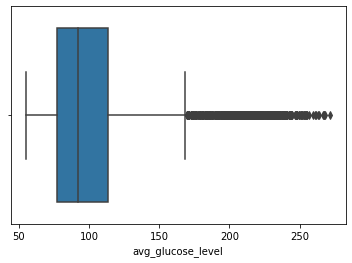

<Figure size 504x360 with 0 Axes>

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.boxplot(x='avg_glucose_level',data=data)
plt.figure(figsize=(7,5))

In [13]:
Q1= data.quantile(0.25)
Q3= data.quantile(0.75)
IQR= Q3-Q1
print(IQR)

age                  36.00
hypertension          0.00
heart_disease         0.00
avg_glucose_level    36.63
bmi                   8.90
stroke                0.00
dtype: float64


In [14]:
print(data < (Q1-1.5*IQR)) or (data > (Q3+1.5*IQR))

      Residence_type    age  avg_glucose_level    bmi  gender  heart_disease  \
0              False  False              False  False   False          False   
1              False  False              False  False   False          False   
2              False  False              False  False   False          False   
3              False  False              False  False   False          False   
4              False  False              False  False   False          False   
...              ...    ...                ...    ...     ...            ...   
4976           False  False              False  False   False          False   
4977           False  False              False  False   False          False   
4978           False  False              False  False   False          False   
4979           False  False              False  False   False          False   
4980           False  False              False  False   False          False   

      hypertension  smoking_status  str

C:\Users\Admin\AppData\Local\Temp\ipykernel_5392\2280638496.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  print(data < (Q1-1.5*IQR)) or (data > (Q3+1.5*IQR))
C:\Users\Admin\AppData\Local\Temp\ipykernel_5392\2280638496.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  print(data < (Q1-1.5*IQR)) or (data > (Q3+1.5*IQR))


,Residence_type,age,avg_glucose_level,bmi,gender,heart_disease,hypertension,smoking_status,stroke,work_type
0,False,False,True,False,False,True,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False
2,False,False,True,False,False,False,False,False,True,False
3,False,False,True,False,False,False,True,False,True,False
4,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
4976,False,False,False,False,False,False,False,False,False,False
4977,False,False,True,False,False,False,False,False,False,False
4978,False,False,False,False,False,False,True,False,False,False
4979,False,False,False,False,False,False,False,False,False,False


In [15]:
min_thresold,max_thresold=data.avg_glucose_level.quantile([0.05,0.95])
min_thresold,max_thresold

(60.73, 216.0)

In [16]:
data[data.avg_glucose_level<min_thresold]

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
7,Female,78.0,0,0,Private,Urban,58.57,24.2,never smoked,1
41,Female,39.0,1,0,Private,Rural,58.09,39.2,smokes,1
45,Female,82.0,0,0,Private,Rural,59.32,33.2,never smoked,1
70,Female,70.0,0,1,Private,Rural,59.35,32.3,formerly smoked,1
100,Female,58.0,0,0,Private,Rural,59.86,28.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...
4745,Female,35.0,0,0,Private,Rural,58.72,40.0,smokes,0
4805,Female,76.0,0,0,Private,Urban,57.92,27.9,formerly smoked,1
4811,Female,78.0,0,0,Self-employed,Rural,60.67,27.1,formerly smoked,1
4950,Male,32.0,1,0,Govt_job,Urban,58.24,31.1,formerly smoked,0


In [17]:
data[data.avg_glucose_level>max_thresold]

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Private,Urban,228.69,36.6,formerly smoked,1
14,Male,75.0,1,0,Private,Urban,221.29,25.8,smokes,1
17,Female,52.0,1,0,Self-employed,Urban,233.29,48.9,never smoked,1
18,Female,79.0,0,0,Self-employed,Urban,228.70,26.6,never smoked,1
27,Male,80.0,0,1,Self-employed,Urban,252.72,30.5,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...
4957,Female,82.0,1,0,Private,Urban,222.52,31.8,formerly smoked,0
4961,Male,59.0,1,0,Govt_job,Rural,253.93,32.1,formerly smoked,0
4967,Male,59.0,0,0,Private,Urban,223.16,33.2,never smoked,0
4970,Female,70.0,0,1,Self-employed,Urban,240.69,30.9,smokes,0


In [18]:
data[(data.avg_glucose_level<min_thresold) & (data.avg_glucose_level>max_thresold)]

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [19]:
def outliers(df,ft):
    Q1= df[ft].quantile(0.25)
    Q3= df[ft].quantile(0.75)
    IQR = Q3-Q1
    
    lower_bound= Q1- 1.5* IQR
    upper_bound= Q3+ 1.5* IQR
    
    ls= df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound) ]
    return ls

In [20]:
index_list= []
for feature in ['avg_glucose_level']:
    index_list.extend(outliers(data,feature))

In [21]:
print(index_list)

[0, 2, 3, 4, 11, 13, 14, 16, 17, 18, 19, 23, 24, 26, 27, 30, 37, 38, 44, 46, 47, 48, 53, 57, 59, 62, 73, 78, 80, 84, 85, 89, 95, 102, 103, 106, 107, 109, 110, 111, 113, 114, 115, 120, 124, 125, 129, 131, 132, 134, 142, 145, 152, 154, 157, 159, 160, 163, 174, 177, 179, 180, 181, 183, 186, 187, 193, 194, 195, 201, 202, 203, 213, 227, 232, 233, 248, 253, 258, 262, 269, 273, 280, 281, 285, 286, 287, 291, 296, 303, 308, 316, 337, 347, 350, 362, 368, 376, 379, 381, 384, 392, 404, 413, 414, 436, 458, 489, 491, 492, 499, 503, 510, 516, 521, 523, 525, 537, 538, 548, 554, 558, 579, 637, 639, 649, 672, 674, 683, 689, 697, 712, 742, 772, 774, 777, 801, 807, 814, 841, 846, 847, 861, 863, 883, 884, 923, 971, 978, 981, 982, 1002, 1007, 1013, 1021, 1025, 1038, 1065, 1073, 1080, 1085, 1093, 1095, 1105, 1107, 1112, 1129, 1132, 1137, 1147, 1152, 1181, 1204, 1214, 1232, 1235, 1238, 1270, 1273, 1275, 1289, 1302, 1303, 1305, 1318, 1326, 1343, 1357, 1359, 1370, 1372, 1382, 1395, 1409, 1411, 1413, 1414, 1415,

In [22]:
def remove(df,ls):
    ls=sorted(set(ls))
    df= df.drop(ls)
    return df

In [23]:
data_cleaned = remove(data,index_list)

In [24]:
data_cleaned.shape

(4379, 10)

In [25]:
data_cleaned

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Male,80.0,0,1,Private,Rural,105.92,32.5,never smoked,1
5,Male,74.0,1,1,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Private,Urban,58.57,24.2,never smoked,1
8,Female,81.0,1,0,Private,Rural,80.43,29.7,never smoked,1
...,...,...,...,...,...,...,...,...,...,...
4974,Male,58.0,0,0,Govt_job,Urban,84.94,30.2,never smoked,0
4976,Male,41.0,0,0,Private,Rural,70.15,29.8,formerly smoked,0
4978,Female,45.0,1,0,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Private,Rural,83.94,30.0,smokes,0


In [26]:
def plot_boxplot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()


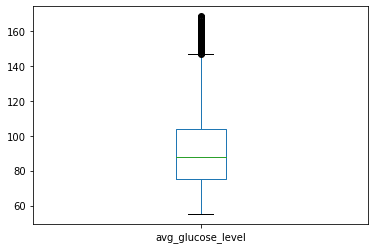

In [27]:
plot_boxplot(data_cleaned,"avg_glucose_level")

In [28]:
sns.boxplot(data_cleaned=data_cleaned,x="avg_glucose_level")

ValueError: Could not interpret input 'avg_glucose_level'

<AxesSubplot:xlabel='bmi'>

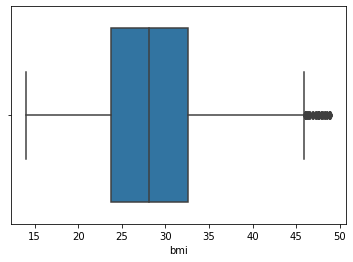

In [29]:
sns.boxplot(x='bmi',data=data)

In [30]:
def outliers(df,ft):
    Q1= df[ft].quantile(0.25)
    Q3= df[ft].quantile(0.75)
    IQR = Q3-Q1
    
    lower_bound= Q1- 1.5* IQR
    upper_bound= Q3+ 1.5* IQR
    
    ls= df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound) ]
    return ls

In [31]:
index_list= []
for feature in ['bmi']:
    index_list.extend(outliers(data,feature))

In [32]:
print(index_list)

[17, 53, 154, 295, 319, 366, 368, 560, 760, 1142, 1167, 1411, 1452, 1833, 2105, 2116, 2135, 2213, 2231, 2453, 2673, 2683, 2807, 3067, 3341, 3649, 3683, 3755, 3899, 3994, 4107, 4154, 4229, 4266, 4329, 4382, 4394, 4530, 4541, 4577, 4653, 4730, 4774]


In [33]:
def remove(df,ls):
    ls=sorted(set(ls))
    df= df.drop(ls)
    return df

In [34]:
data_cleaned2 = remove(data,index_list)

In [35]:
data1=data_cleaned

In [36]:
data1.shape

(4379, 10)

### Convert Categerical data into Numerical

In [37]:
print(len(data1['gender'].value_counts()))
print(len(data1['smoking_status'].value_counts()))
print(len(data1['work_type'].value_counts()))
print(len(data1['Residence_type'].value_counts()))

2
3
4
2


In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [39]:
data1.gender = le.fit_transform(data1.gender)
data1.smoking_status = le.fit_transform(data1.smoking_status)
data1.work_type = le.fit_transform(data1.work_type)
data1.Residence_type = le.fit_transform(data1.Residence_type)

In [40]:
data1.head()

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,1,80.0,0,1,1,0,105.92,32.5,1,1
5,1,74.0,1,1,1,0,70.09,27.4,1,1
6,0,69.0,0,0,1,1,94.39,22.8,1,1
7,0,78.0,0,0,1,1,58.57,24.2,1,1
8,0,81.0,1,0,1,0,80.43,29.7,1,1


In [41]:
X=data1.drop('stroke',axis=1)
y=data1['stroke']

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [43]:
len(X)

4379

In [44]:
len(X_train)

3503

In [45]:
len(X_test)

876

## Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [47]:
model.fit(X_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
model.score(X_test,y_test)

0.95662100456621

In [49]:
y_predicted=model.predict (X_test)

In [50]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_predicted)

Text(69.0, 0.5, 'y_test')

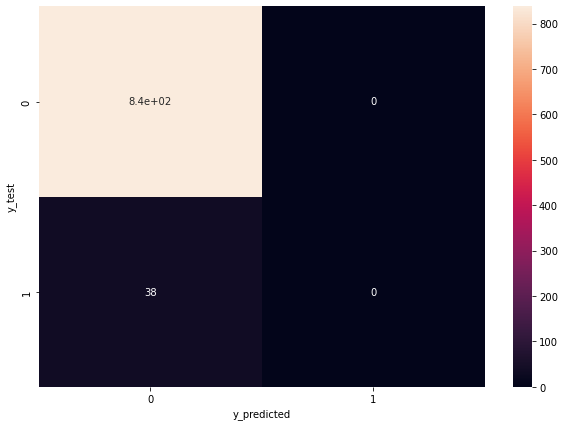

In [51]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('y_predicted')
plt.ylabel('y_test')

## KNN Classifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5)

In [53]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [54]:
knn.score(X_test,y_test)

0.9554794520547946

In [55]:
y_pred= knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

In [56]:
cm

array([[836,   2],
       [ 37,   1]], dtype=int64)

Text(69.0, 0.5, 'y_test')

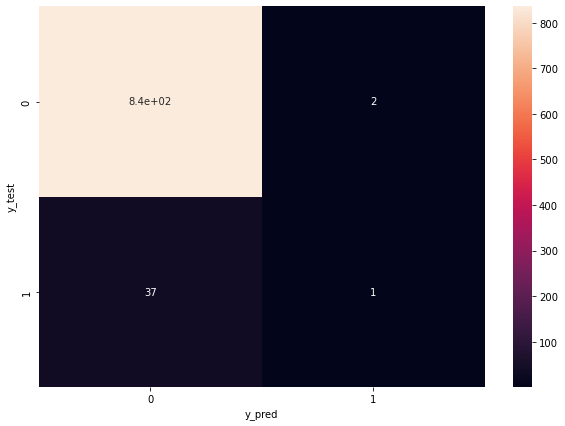

In [57]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('y_pred')
plt.ylabel('y_test')

## SVM Classifier

In [58]:
from sklearn.svm import SVC
model=SVC()

In [59]:
model.fit(X_train,y_train)

SVC()

In [60]:
model.score(X_test,y_test)

0.95662100456621